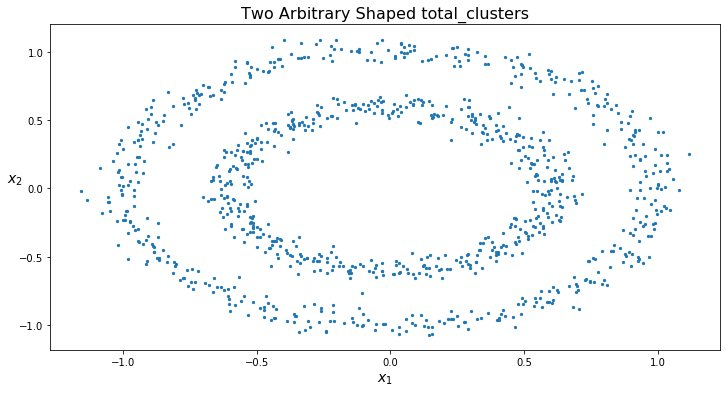

init
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43.]


In [21]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs, make_circles
# from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# blob_centers = np.array(
#     [[0.2, 2.3],
#      [-1.5, 2.3],
#      [-2.8, 1.8],
#      [-2.8, 2.8],
#      [-2.8, 1.3]])
# 
# blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# class Kmeans:
#     def __init__(self):
#         print("A")
# 
#     def fit(self, X, K, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
#         
#         labels = []
#         total_clusters = K
#         # Get the cluster centroids
#         data_points = X
#         random_num = np.random.randint(data_points, size=1)
#         centroid = [X[random_num]]
#         for k in range(1, total_clusters):
#             distance = []
#             for i in len(data_points):
#                 if distance_metric == "euclidean":
#                     # cycle through each centroid, and get the minimum euclidean distance.         
#                     distance.append(np.min([(euclidean_metrics(X[i], centroid[j])) for j in k]))
#             
#             total_distance = np.sum(np.square(distance))
#             distribution_proportion = []
#             for n in data_points:
#                 distribution_proportion.append((np.square(distance[n]))/total_distance)
# 
#             index_max_dp = np.where(distribution_proportion == np.max(distribution_proportion))
#             centroid[k] = X[index_max_dp]
# 
#         # Getting labels
#         for i in len(data_points):
#             distance_dp_centroid = [euclidean_metrics(X[i], centroid[k]) for k in total_clusters]
#             cluster = np.where(distance_dp_centroid == np.min(distance_dp_centroid))
#             labels.append(cluster)    
# 
#         return labels
# 
#     def score(self, X):
#         return 0.0

class DBSCAN:

    def __init__(self):
        print("init")

    def fit(self, X, eps, min_samples, distance_metric="euclidean"):
     
        cluster_num = 0
        noise = -1
        undefined = -2

        labels = np.empty(len(X)) # creating a list of empty array as labels
        labels.fill(undefined)  # fill the empty list with undefined values
        
        for index in range(len(X)): # iterating over each points index in data points
            if labels[index] != undefined:
                continue
            neighbors_indices = self.RangeQuery(X, distance_metric, X[index], eps)

            if len(neighbors_indices) < min_samples:
                labels[index] = noise
                continue

            cluster_num += 1
            labels[index] = cluster_num
            neighbors_indices = np.asarray([x for x in neighbors_indices if x != index])

            restart_loop = 0
            while restart_loop == 0:
                restart_loop = -1
                for i in neighbors_indices:
                    if labels[i] == noise:
                        labels[i] = cluster_num
    
                    elif labels[i] != undefined:
                        continue
    
                    labels[i] = cluster_num
                    new_neighbors_indices = self.RangeQuery(X, distance_metric, X[i], eps)
                    if len(new_neighbors_indices) >= min_samples:
                        neighbors_indices = np.union1d(neighbors_indices, new_neighbors_indices)
                        restart_loop = 0
                        break  
                    
        return labels

    def RangeQuery(self, X, distance_metric, p, eps):
        neighbors = []
        if distance_metric == "euclidean":
            for index in range(len(X)):
                if euclidean_metrics(X[index], p) <= eps:
                    neighbors.append(index)

        return neighbors

def euclidean_metrics(x, y):
    distance_xy = np.square(np.subtract(x, y))
    sum_distance = np.sum(distance_xy)

    return np.sqrt(sum_distance)


def intra_cluster_distance(x, labels, i):
    same_cluster_indices = np.where(labels == labels[i])[0]
    if len(same_cluster_indices) == 0:
        a = 0
    else:
        distance = []
        for j in same_cluster_indices:
            if j != i:
                distance.append(euclidean_metrics(x[i], x[j]))
        a = np.mean(distance)

    return a


def nearest_cluster_distance(x, labels, i):
    different_cluster_indices = np.where(labels != labels[i])[0]
    if len(different_cluster_indices) == 0:
        b = 0
    else:
        distance_dict = {}
        for j in different_cluster_indices:
            key = labels[j]
            if key in distance_dict.keys():
                distance_dict[key].append(euclidean_metrics(x[i], x[j]))
            else:    
                distance_dict.update({key: [euclidean_metrics(x[i], x[j])]})
        
        mean_distance = []
        for row in distance_dict.values():
            mean_distance.append([np.mean(row)])
        
        min_mean_distance = np.min(mean_distance)
        b = min_mean_distance
    return b


def silhouette_score(x, labels):

    a = []
    b = []
    score = []
    for i in range(len(labels)):
        a.append(intra_cluster_distance(x, labels, i))
        b.append(nearest_cluster_distance(x, labels, i))
        score.append((b[i] - a[i]) / (np.maximum(a[i], b[i])))

    return np.mean(score)


# ### here start K means
# x, y = make_blobs(n_samples=2000, centers=blob_centers,
#                     cluster_std=blob_std, random_state=7)
# 
# # kmeans = KMeans()
# # kmeans.fit()
# 
# kmeans_per_k = [KMeans(n_cluster_num=k, random_state=42).fit(x)
#                     for k in range(1, 10)]
# 
# # getting the silhouette score
# silhouette_scores = [silhouette_score(x, model.labels_)
#                         for model in kmeans_per_k[1:]]
# 
# plt.figure(figsize=(10, 4))
# plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.show()


# ### here start DBSCAN

X, y = make_circles(n_samples=1000, noise=0.05, factor=0.6)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')

plt.title("Two Arbitrary Shaped total_clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()


# dbscan = DBSCAN(eps=0.05, min_samples=5)
# dbscan.fit(X)
# print(np.unique(dbscan.labels_))

dbscan = DBSCAN()
labels = dbscan.fit(X, eps=0.05, min_samples=5, distance_metric="euclidean")
print(np.unique(labels))

# def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
#     
#     labels = dbscan.fit(X, eps=0.05, min_samples=5, distance_metric="euclidean")
#     core_sample_indices_ = np.intersect1d(np.where(labels != -1)[0], np.where(labels != -2)[0])
#     
#     core_mask = np.zeros_like(labels, dtype=bool)
#     core_mask[core_sample_indices_] = True
#     anomalies_mask = labels == -1
#     non_core_mask = ~(core_mask | anomalies_mask)
# 
#     cores = np.asarray(X[i] for i in core_sample_indices_)
#     anomalies = X[anomalies_mask]
#     non_cores = X[non_core_mask]
#     
#     plt.scatter(cores[:, 0], cores[:, 1],
#                 c=labels[core_mask], marker='o', s=size, cmap="Paired")
#     plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=labels[core_mask])
#     plt.scatter(anomalies[:, 0], anomalies[:, 1],
#                 c="r", marker="x", s=100)
#     plt.scatter(non_cores[:, 0], non_cores[:, 1], c=labels[non_core_mask], marker=".")
#     if show_xlabels:
#         plt.xlabel("$x_1$", fontsize=14)
#     else:
#         plt.tick_params(labelbottom=False)
#     if show_ylabels:
#         plt.ylabel("$x_2$", fontsize=14, rotation=0)
#     else:
#         plt.tick_params(labelleft=False)
#     plt.title("eps={:.2f}, min_samples={}".format(eps=0.05, min_samples=5), fontsize=14)
# 
# 
# plt.figure(figsize=(10, 6))
# plot_dbscan(dbscan, X, size=100)
# plt.show()